Check the server is running

In [1]:
!curl localhost:5000/

Flask app exposing tensorflow lite model: mobilenet_ssd_v2_coco_quant_postprocess.tflite 


In [2]:
import requests
import json
from PIL import Image, ImageDraw
from helpers import draw_box
%matplotlib inline

IP = "localhost" # Pi3
PREDICT_URL = f'http://{IP}:5000/v1/object/detection'

IMAGE_PATH = "images/people_car.jpg"

# load the input image and construct the payload for the request
image = open(IMAGE_PATH, "rb").read()
payload = {"image": image}

In [3]:
%%time
# submit the request
response = requests.post(PREDICT_URL, files=payload)

CPU times: user 0 ns, sys: 21.4 ms, total: 21.4 ms
Wall time: 436 ms


In [4]:
response.json()

{'image_height': 480,
 'image_width': 960,
 'objects': [{'box': [0.25783607363700867,
    0.33058103919029236,
    0.7246008515357971,
    0.6428706645965576],
   'name': 'car',
   'score': 0.953125},
  {'box': [0.28432977199554443,
    0.28714725375175476,
    0.6788091659545898,
    0.37872299551963806],
   'name': 'person',
   'score': 0.73046875},
  {'box': [0.524590253829956,
    0.22533127665519714,
    0.8592637777328491,
    0.3502572476863861],
   'name': 'bicycle',
   'score': 0.66015625},
  {'box': [0.2879002094268799,
    0.2565079927444458,
    0.6752387285232544,
    0.36057573556900024],
   'name': 'person',
   'score': 0.58203125},
  {'box': [0.30700039863586426,
    0.871345043182373,
    0.8164434432983398,
    0.9612630605697632],
   'name': 'person',
   'score': 0.33984375}],
 'success': True}

In [5]:
predictions = response.json()['objects']
len(predictions)

5

In [6]:
# ensure the request was successful
if response.status_code == 200:    
    # loop over the predictions and display them
    for result in predictions:
        print(f"{result['name']}: {result['score']} : {result['box']}")

car: 0.953125 : [0.25783607363700867, 0.33058103919029236, 0.7246008515357971, 0.6428706645965576]
person: 0.73046875 : [0.28432977199554443, 0.28714725375175476, 0.6788091659545898, 0.37872299551963806]
bicycle: 0.66015625 : [0.524590253829956, 0.22533127665519714, 0.8592637777328491, 0.3502572476863861]
person: 0.58203125 : [0.2879002094268799, 0.2565079927444458, 0.6752387285232544, 0.36057573556900024]
person: 0.33984375 : [0.30700039863586426, 0.871345043182373, 0.8164434432983398, 0.9612630605697632]


In [8]:
image = Image.open(IMAGE_PATH)  # PIL img object.
draw = ImageDraw.Draw(image)

In [9]:
img_height = response.json()['image_height']
img_width = response.json()['image_width']

In [10]:
for result in predictions:
    draw_box(draw, result['box'], img_width, img_height, text=result['name'])

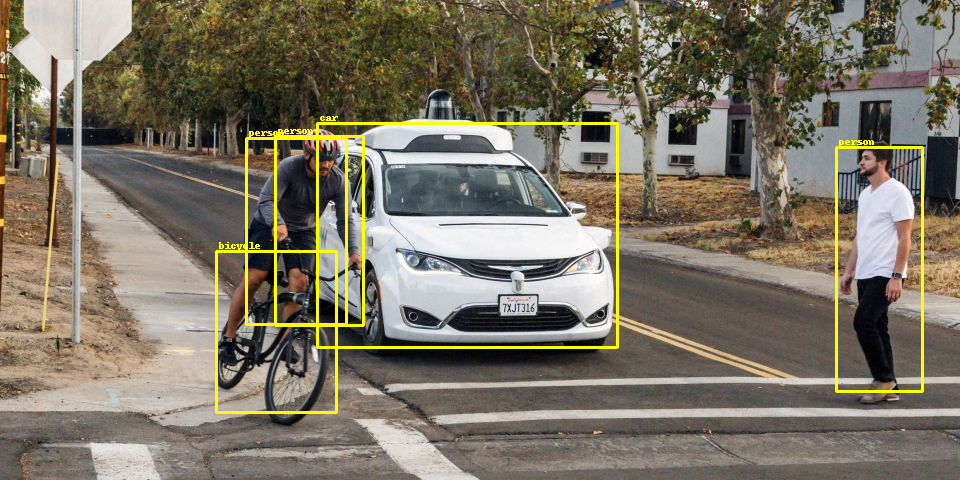

In [11]:
image